# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from pmdarima import auto_arima



# Preparing the dataset

In [9]:
#creating the dataframe
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\wipro_Stock_data.csv")
df = df.sort_index(ascending=True, axis=0)
display(df)

#extracting the neccessary column
dataset = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close_Price'])

for i in range(0,len(df)):
    dataset['Date'][i] = df['Date'][i]
    dataset['Close_Price'][i] = df['Close Price'][i]

#setting index
dataset.index = df["Date"]
dataset.drop('Date', axis=1, inplace=True)
display(dataset)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,10-Jul-2019,265.50,264.70,269.50,263.30,266.80,266.95,267.54,2780563,7.439242e+08,36868,985283,35.43
1,WIPRO,EQ,11-Jul-2019,266.95,267.50,270.00,266.10,268.00,267.75,267.60,2691893,7.203577e+08,29145,1415397,52.58
2,WIPRO,EQ,12-Jul-2019,267.75,268.00,268.65,258.05,259.80,258.95,261.02,7595278,1.982531e+09,84569,2169089,28.56
3,WIPRO,EQ,15-Jul-2019,258.95,260.00,262.00,255.90,260.45,259.90,258.77,4747449,1.228518e+09,46716,1338074,28.19
4,WIPRO,EQ,16-Jul-2019,259.90,259.00,262.70,256.25,260.00,260.00,259.13,4861657,1.259802e+09,68300,1657568,34.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,WIPRO,EQ,02-Jul-2021,539.35,540.10,542.30,533.60,538.65,538.60,537.30,4157307,2.233736e+09,98129,1552218,37.34
492,WIPRO,EQ,05-Jul-2021,538.60,542.90,542.90,535.55,536.50,536.35,537.49,3439169,1.848526e+09,71275,1313313,38.19
493,WIPRO,EQ,06-Jul-2021,536.35,536.55,538.30,531.85,533.35,532.60,533.81,4193441,2.238520e+09,82063,1544484,36.83
494,WIPRO,EQ,07-Jul-2021,532.60,534.05,536.40,525.10,533.20,532.15,531.49,5377687,2.858185e+09,99342,1812291,33.70


,Close_Price
Date,
10-Jul-2019,266.95
11-Jul-2019,267.75
12-Jul-2019,258.95
15-Jul-2019,259.9
16-Jul-2019,260
...,...
02-Jul-2021,538.6
05-Jul-2021,536.35
06-Jul-2021,532.6


In [10]:
#splitting test and train datasets
data = dataset.values
train = data[0:434,:]
test = data[434:,:]


In [11]:
#scaling the data and preparing it for the model 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
print(y_train.shape)
display(test)

(374, 60, 1)
(374,)


array([[450.1],
       [432.6],
       [418.95],
       [430.7],
       [469.2],
       [472.75],
       [470.1],
       [486.65],
       [475.7],
       [480.3],
       [485.05],
       [489.3],
       [489.85],
       [492.75],
       [487.35],
       [481.95],
       [490.6],
       [512.3],
       [515.25],
       [525.95],
       [518.4],
       [507.6],
       [498.45],
       [499.8],
       [508.05],
       [511.65],
       [508.25],
       [512.7],
       [514.9],
       [517.55],
       [527.25],
       [540.9],
       [538.7],
       [539.05],
       [542.8],
       [543.0],
       [539.05],
       [541.2],
       [548.25],
       [550.6],
       [544.2],
       [554.25],
       [554.3],
       [561.6],
       [557.9],
       [555.25],
       [558.7],
       [549.8],
       [542.15],
       [556.55],
       [540.15],
       [549.05],
       [547.5],
       [547.4],
       [542.6],
       [545.65],
       [539.35],
       [538.6],
       [536.35],
       [532.6],
       [532.

# Training the model

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
374/374 - 23s - loss: 0.0046
Epoch 2/20
374/374 - 5s - loss: 0.0016
Epoch 3/20
374/374 - 5s - loss: 0.0014
Epoch 4/20
374/374 - 5s - loss: 0.0010
Epoch 5/20
374/374 - 5s - loss: 0.0010
Epoch 6/20
374/374 - 5s - loss: 7.5757e-04
Epoch 7/20
374/374 - 5s - loss: 7.7655e-04
Epoch 8/20
374/374 - 5s - loss: 6.7670e-04
Epoch 9/20
374/374 - 5s - loss: 6.2277e-04
Epoch 10/20
374/374 - 5s - loss: 5.8313e-04
Epoch 11/20
374/374 - 5s - loss: 4.8007e-04
Epoch 12/20
374/374 - 6s - loss: 4.6478e-04
Epoch 13/20
374/374 - 6s - loss: 3.8327e-04
Epoch 14/20
374/374 - 6s - loss: 4.0303e-04
Epoch 15/20
374/374 - 6s - loss: 4.5229e-04
Epoch 16/20
374/374 - 6s - loss: 4.3112e-04
Epoch 17/20
374/374 - 5s - loss: 4.0700e-04
Epoch 18/20
374/374 - 6s - loss: 3.6887e-04
Epoch 19/20
374/374 - 6s - loss: 4.7471e-04
Epoch 20/20
374/374 - 6s - loss: 5.7283e-04


In [6]:
#predicting 246 values, using past 60 from the train data
print(len(test))
input = dataset[len(dataset) - len(test) - 60:].values
input = input.reshape(-1,1)
input  = scaler.transform(input)

X_test = []
for i in range(60,input.shape[0]):
    X_test.append(input[i-60:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Closing_price = model.predict(X_test)
Closing_price = scaler.inverse_transform(Closing_price)



62
(62, 60)


# Testing the model

In [7]:
#testing the accuracy
rms=np.sqrt(np.mean(np.power((test-Closing_price),2)))
rms

13.48427235043226

In [8]:
train = dataset[:434]
test = dataset[434:]
test['Predictions'] = Closing_price 

<ipython-input-8-c61344cf001a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = Closing_price


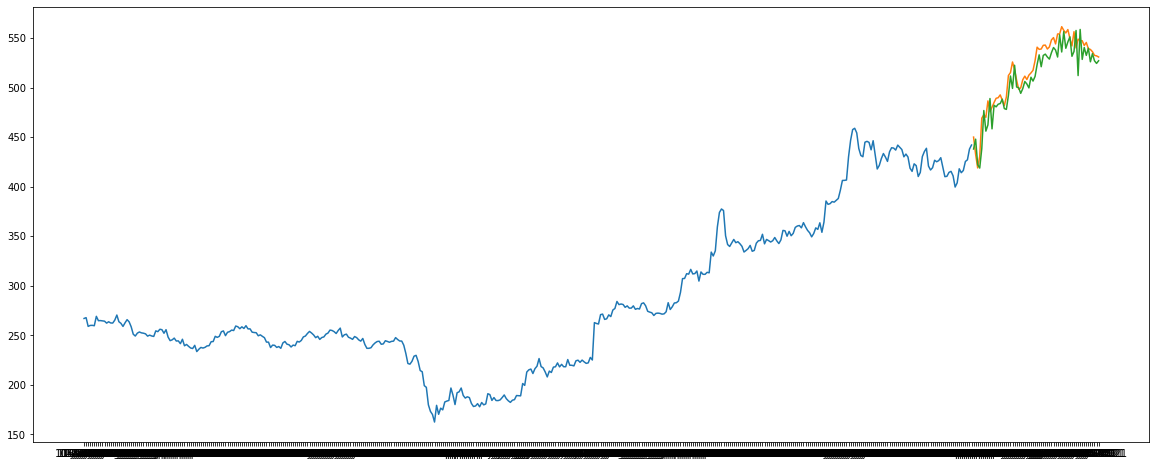

In [9]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

plt.plot(train['Close_Price'])
plt.plot(test[['Close_Price','Predictions']])




In [12]:
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return np.sqrt(mean_error)

In [13]:
rmse_metric(test['Close_Price'],test['Predictions'])

13.48427235043226

In [21]:
##### ARIMA MODEL


In [22]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\wipro_Stock_data.csv")

In [26]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:435]
valid = data[435:]

training = train['Close Price']
validation = valid['Close Price']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=61)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2964.385, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2852.591, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2965.464, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2796.825, Time=0.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2796.464, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2852.855, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=2796.874, Time=0.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2798.777, Time=1.52 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=2798.4

In [28]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close Price'])-np.array(forecast['Prediction'])),2)))
rms

63.897150655931476

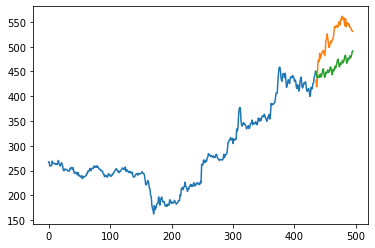

In [30]:
#plot
plt.plot(train['Close Price'])
plt.plot(valid['Close Price'])
plt.plot(forecast['Prediction'])

In [35]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close Price'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:435]
valid = new_data[435:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

ModuleNotFoundError: No module named 'fbprophet'